# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


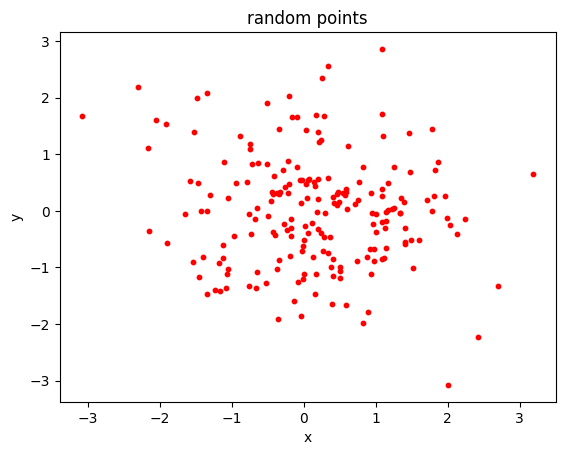

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

n = 200
x = np.random.randn(n)
y = np.random.randn(n)

plt.scatter(x, y, s=10, c="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('random points')
plt.show()


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


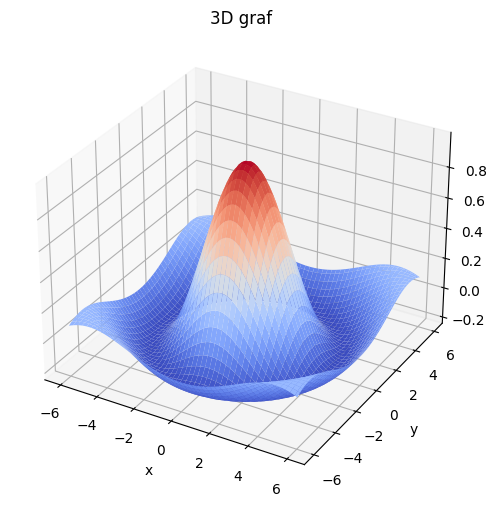

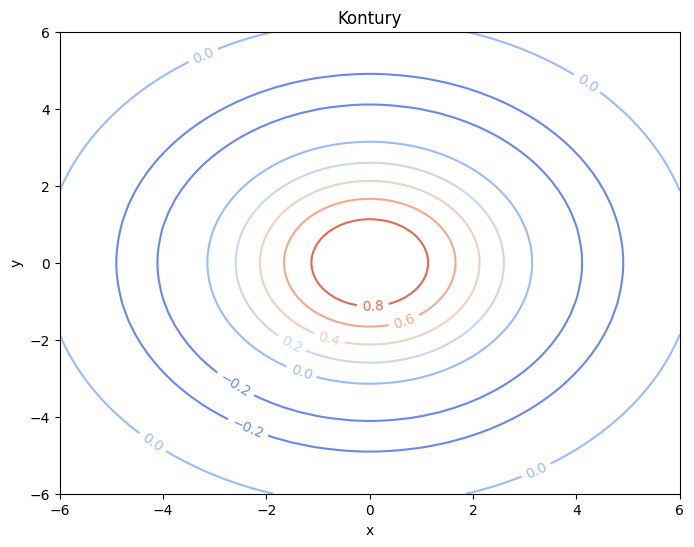

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    r = np.sqrt(x**2 + y**2)
    return np.sin(r) / r

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D graf')

fig2, ax2 = plt.subplots(figsize=(8, 6))
contour_plot = ax2.contour(X, Y, Z, cmap='coolwarm')
ax2.clabel(contour_plot, inline=True, fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Kontury')

plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.



4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.



5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def integer_spiral(n):
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1
    pos_col = n//2 + 1

    i = 1

    A[pos_row, pos_col] = i
    i += 1
    pos_row -= 1

    while i <= n**2:
        A[pos_row, pos_col] = i
        i += 1
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1
        else:
            pos_row += 1

    return A[1:-1, 1:-1]

def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2), dtype=int)
    i = 1

    r = n//2 + 1
    c = n//2 + 1

    A[r,c] = i
    i += 1
    r -= 1

    for k in range(1, n//2 + 1):
        A[r, c:c-(k*2):-1] = np.arange(i, i+(k*2))
        c = c-(k*2)+1
        r += 1
        i = i+(k*2)

        A[r:r+(k*2), c] = np.arange(i, i+(k*2))
        r = r+(k*2)-1
        c += 1
        i = i+(k*2)

        A[r, c:c+(k*2)] = np.arange(i, i+(k*2))
        c = c+(k*2)-1
        r -= 1
        i = i+(k*2)

        A[r:r-(k*2):-1, c] = np.arange(i, i+(k*2))
        r = r-(k*2)
        i = i+(k*2)

    return A[1:-1, 1:-1]



# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.